# Modelo Naive Bayes para Predecir Enfermedades Cardíacas
Este notebook utiliza el dataset de enfermedades cardíacas para entrenar un modelo de Naive Bayes y evaluar su desempeño mediante una matriz de confusión.

El dataset contiene información sobre diversas características relacionadas con la salud cardíaca y una columna que indica si una persona tiene o no una enfermedad cardíaca.

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar el Dataset
Cargamos el dataset que contiene información sobre la salud del corazón.

In [10]:
# Cargar el dataset
data = pd.read_csv('../csv/corazon.csv')
data.head()  # Mostrar las primeras filas del dataset
data.info()
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## Preprocesamiento
Convertimos las variables categóricas en variables numéricas utilizando el método `get_dummies`. Luego, separamos las características independientes (`X`) de la variable objetivo (`y`), que indica si una persona tiene una enfermedad cardíaca.

In [11]:
# Convertir variables categóricas a numéricas
data_encoded = pd.get_dummies(data, drop_first=True)

# Separar las variables independientes y dependientes
X = data_encoded.drop('HeartDisease', axis=1)
y = data_encoded['HeartDisease']


In [12]:
data.head()
data.info()
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## División del Conjunto de Datos
Dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba utilizando un 70% para el entrenamiento y un 30% para las pruebas.

In [13]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Entrenamiento del Modelo Naive Bayes
Entrenamos el modelo Naive Bayes con el conjunto de entrenamiento.

In [15]:
# Crear y entrenar el modelo Naive Bayes usando distribución Gausiana
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

## Evaluación del Modelo
Realizamos predicciones en el conjunto de prueba y generamos la matriz de confusión para evaluar el desempeño del modelo.

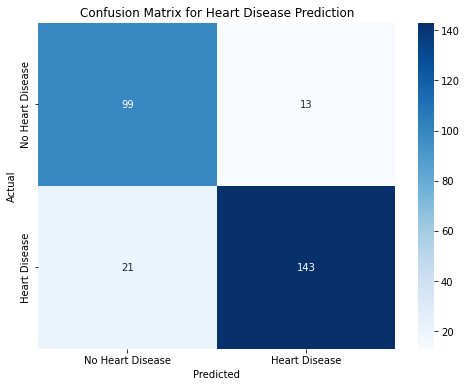

In [16]:
# Realizar predicciones y generar la matriz de confusión
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Heart Disease Prediction')
plt.show()

## Informe de Clasificación
Además de la matriz de confusión, generamos un informe de clasificación que incluye precisión, recall y F1-score.

In [17]:
# Mostrar el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



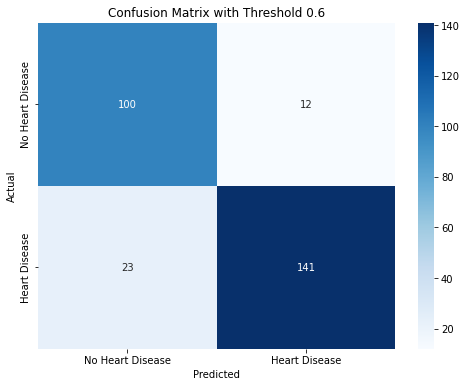

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       112
           1       0.92      0.86      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.87      0.87       276



In [18]:
# Predecir las probabilidades
y_proba = model.predict_proba(X_test)

# Establecer un nuevo umbral de 0.6 en lugar de 0.5
threshold = 0.6
y_pred_threshold = (y_proba[:, 1] >= threshold).astype(int)

# Generar la matriz de confusión con el nuevo umbral
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)

# Visualizar la matriz de confusión con el nuevo umbral
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_threshold, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Disease', 'Heart Disease'], 
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix with Threshold {threshold}')
plt.show()




In [19]:
# Mostrar el informe de clasificación con el nuevo umbral
print(classification_report(y_test, y_pred_threshold))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       112
           1       0.92      0.86      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.87      0.87       276

